## In this project, I am attempting to predict home value using a Kaggle "Housing Prices Competition" dataset.

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
pd.set_option('display.max_rows', None)

In [2]:
#Getting a quick overview of the dataset using the exploretransform package.
import exploretransform as et
et.peek(df)

,variable,dtype,lvls,obs,head
0,Id,int64,1460,1460,"[1, 2, 3, 4, 5]"
1,MSSubClass,int64,15,1460,"[60, 20, 60, 70, 60]"
2,MSZoning,object,5,1460,"[RL, RL, RL, RL, RL]"
3,LotFrontage,float64,110,1460,"[65.0, 80.0, 68.0, 60.0, 84.0]"
4,LotArea,int64,1073,1460,"[8450, 9600, 11250, 9550, 14260]"
5,Street,object,2,1460,"[Pave, Pave, Pave, Pave, Pave]"
6,Alley,object,2,1460,"[nan, nan, nan, nan, nan]"
7,LotShape,object,4,1460,"[Reg, Reg, IR1, IR1, IR1]"
8,LandContour,object,4,1460,"[Lvl, Lvl, Lvl, Lvl, Lvl]"
9,Utilities,object,2,1460,"[AllPub, AllPub, AllPub, AllPub, AllPub]"


## Since there are some 'nan' values in the data, I should begin by dealing with the missing values.

In [3]:
import numpy as np

# Inspect Missing Values
def report_missing_data(df):
    '''
    IN: Dataframe 
    OUT: Dataframe with reported count of missing values, % missing per column and per total data
    '''
    
    missing_count_per_column = df.isnull().sum()
    missing_count_per_column = missing_count_per_column[missing_count_per_column>0]
    total_count_per_column = df.isnull().count()
    total_cells = np.product(df.shape)
    
    # Percent calculation
    percent_per_columnn = 100*missing_count_per_column/total_count_per_column
    percent_of_total = 100*missing_count_per_column/total_cells
    
    # Creating new dataframe for reporting purposes only
    missing_data = pd.concat([missing_count_per_column,
                              percent_per_columnn,
                              percent_of_total], axis=1, keys=['Total_Missing', 'Percent_per_column','Percent_of_total'])
    
    
    missing_data = missing_data.dropna()
    missing_data.index.names = ['Feature']
    missing_data.reset_index(inplace=True)

    
    
    return missing_data.sort_values(by ='Total_Missing',ascending=False)

df_missing = report_missing_data(df)

In [4]:
df_missing

,Feature,Total_Missing,Percent_per_column,Percent_of_total
16,PoolQC,1453.0,99.520548,1.228649
18,MiscFeature,1406.0,96.301370,1.188906
1,Alley,1369.0,93.767123,1.157619
17,Fence,1179.0,80.753425,0.996956
10,FireplaceQu,690.0,47.260274,0.583460
0,LotFrontage,259.0,17.739726,0.219009
11,GarageType,81.0,5.547945,0.068493
12,GarageYrBlt,81.0,5.547945,0.068493
13,GarageFinish,81.0,5.547945,0.068493
14,GarageQual,81.0,5.547945,0.068493


Text(0.5, 1.0, 'Missing Data')

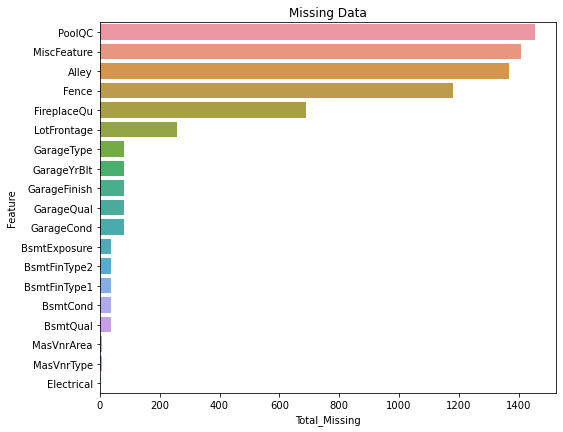

In [5]:
#The graph below is a bit redundant, but it's a nice visual.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,15))
plt.subplot(221)
sns.barplot(y='Feature',x='Total_Missing',data=df_missing)
plt.title('Missing Data')

## It's very helpful to read the data_description.txt file before randomly deleting predictors. 

## For several predictors, "NA" is coded to mean "None". For example, the predictor "Alley" has a level "NA - No Alley Access" which is quite different from the data being missing. To fix these issues, I'm going to relabel the "NA" level as "None"

## There are some predictors where "NA" actually does indicate missing data: Electrical, MasVnrArea, MasVnrType, and LotFrontage. I'm going to drop the 9 rows of missing data for the first three and attempt to impute the missing data for LotFrontage.

In [6]:
# Drop 9 rows with actual missing data.
df = df.dropna(how='any', subset=['Electrical', 'MasVnrArea', 'MasVnrType'])
# A relatively safe alternative here would be to impute with mean / median.

In [7]:
#Impute Missing LotFrontage values
import imputena
imputena.linear_regression(data=df, dependent='LotFrontage', predictors=['LotArea', '1stFlrSF'], regressions='available', noise=False, inplace=True)

In [8]:
# Finally, convert remaining NA to 'None'
df = df.where(df.notna(), 'None')
df = df.apply(pd.to_numeric,errors='ignore')

## Next, I'm going to split the data into predictors vs response.

In [9]:
y = df.SalePrice
x = df.drop('SalePrice', axis=1)

## Finally, I'm making dummy variables for the categorical predictors and splitting the data into training / test sets.

In [10]:
catCols = [col for col in x.columns if df[col].dtype=="O"]
cat_variables = x[catCols]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
x = x.drop(catCols, axis=1) 
x = pd.concat([x, cat_dummies], axis=1)

In [11]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=1)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

def get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_x, train_y)
    preds_val = model.predict(test_x)
    mae = mean_absolute_error(test_y, preds_val)
    return(mae)

for max_leaf_nodes in [10,25,50,70,100,150,200,250,500,1000]:
    my_mae = get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 10  		 Mean Absolute Error:  29544
Max leaf nodes: 25  		 Mean Absolute Error:  28019
Max leaf nodes: 50  		 Mean Absolute Error:  26134
Max leaf nodes: 70  		 Mean Absolute Error:  26927
Max leaf nodes: 100  		 Mean Absolute Error:  25676
Max leaf nodes: 150  		 Mean Absolute Error:  25065
Max leaf nodes: 200  		 Mean Absolute Error:  25258
Max leaf nodes: 250  		 Mean Absolute Error:  25398
Max leaf nodes: 500  		 Mean Absolute Error:  25821
Max leaf nodes: 1000  		 Mean Absolute Error:  25935


## Optimal tree size has 250 leaf nodes.

In [13]:
dt_model = DecisionTreeRegressor(max_leaf_nodes=250, random_state=1)
dt_model.fit(train_x, train_y)
test_pred = dt_model.predict(test_x)

dtmae = mean_absolute_error(test_y, test_pred)
print(dtmae)

24517.40943247685


## Random Forest Investigation

In [21]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, y):
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,                         n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return best_params

rfr_model(train_x,train_y)

{'max_depth': 6, 'n_estimators': 1000}

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(train_x, train_y)
test_pred2 = forest_model.predict(test_x)
rfmae = mean_absolute_error(test_y, test_pred2)
print(rfmae)

17827.598350515465


## XG Boost Investigation

In [30]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(train_x, train_y)
test_pred3 = xgb.predict(test_x)
xgmae = mean_absolute_error(test_y, test_pred3)
print(xgmae)

19001.669458762888


In [16]:
#test.csv has no response variable. submit to contest.
#test = pd.read_csv('test.csv')
